In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("filtered_reddit_posts.csv")

df.head()


,id,timestamp,subreddit,cleaned_text,upvotes,comments,url
0,doqwow,1.572361e+09,depression,mostbroken leastunderstood rules helpers may i...,2366,177,https://www.reddit.com/r/depression/comments/d...
1,1lfgnxr,1.750354e+09,depression,even depression seeing reality clearly world f...,32,12,https://www.reddit.com/r/depression/comments/1...
2,1lfirj8,1.750359e+09,depression,clear sign person struggling depression someon...,18,14,https://www.reddit.com/r/depression/comments/1...
3,1lfkhld,1.750363e+09,depression,dumb make depressed envy smart people intellig...,6,7,https://www.reddit.com/r/depression/comments/1...
4,1lfjihf,1.750361e+09,depression,feels like im existing living ive struggled ma...,6,0,https://www.reddit.com/r/depression/comments/1...


In [2]:
# 1. Basic overview of the dataset
print(df.info())           # Check data types and missing values
print(df.describe())       # Get summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            539 non-null    object 
 1   timestamp     539 non-null    float64
 2   subreddit     539 non-null    object 
 3   cleaned_text  539 non-null    object 
 4   upvotes       539 non-null    int64  
 5   comments      539 non-null    int64  
 6   url           539 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.6+ KB
None
          timestamp      upvotes    comments
count  5.390000e+02   539.000000  539.000000
mean   1.740617e+09    36.732839    7.424861
std    3.144008e+07   358.768473   26.665619
min    1.521349e+09     0.000000    0.000000
25%    1.749835e+09     1.000000    1.000000
50%    1.750285e+09     3.000000    2.000000
75%    1.750343e+09     6.000000    5.000000
max    1.750365e+09  7489.000000  422.000000


Start date: 2018-03-18 04:57:56
End date: 2025-06-19 20:30:03


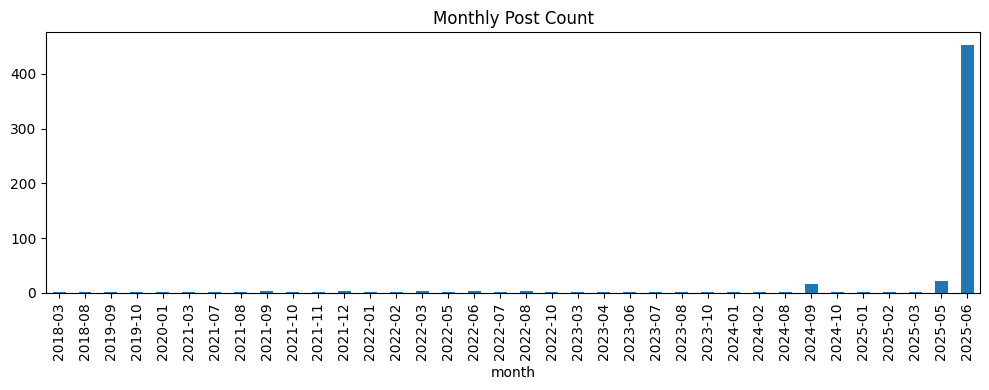

In [3]:
# 2. Analyze timestamp range and convert to readable datetime format
df['date'] = pd.to_datetime(df['timestamp'], unit='s')  # Convert Unix timestamp to datetime
print(f"Start date: {df['date'].min()}")                # Earliest post
print(f"End date: {df['date'].max()}")       

# Plot the number of posts per month
df['month'] = df['date'].dt.to_period('M')              # Extract year-month period
df['month'].value_counts().sort_index().plot(
    kind='bar', figsize=(10,4), title='Monthly Post Count'
)
plt.tight_layout()
plt.show()           # Latest post

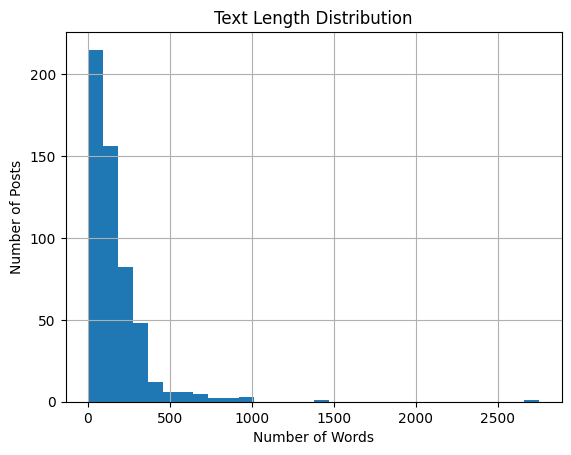

In [4]:
# 3. Analyze text length (number of words in each post)
df['text_length'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))  # Count words
df['text_length'].hist(bins=30)                                              # Histogram
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Posts")
plt.show()

In [5]:
# 4. Analyze distribution of upvotes and comments
print(df[['upvotes', 'comments']].describe())  # Summary stats for engagement metrics

           upvotes    comments
count   539.000000  539.000000
mean     36.732839    7.424861
std     358.768473   26.665619
min       0.000000    0.000000
25%       1.000000    1.000000
50%       3.000000    2.000000
75%       6.000000    5.000000
max    7489.000000  422.000000
